In [1]:
import pandas as pd
from pathlib import Path
from sklearn.cluster import KMeans
import hvplot.pandas
import holoviews as hv
from holoviews import opts
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Clustering Analysis: HbA1c Level & Blood Glucose Level

In [2]:
# HbA1c_level & blood_glucose_level
diabetes_df = pd.read_csv("C:/Users/jaime/Assignments/Project 4/diabetes.csv")

selected_columns = ['HbA1c_level', 'blood_glucose_level']
diabetes_df_subset = diabetes_df[selected_columns]

diabetes_df_subset.head()

HbA1c_level  blood_glucose_level
0          6.6                  140
1          6.6                   80
2          5.7                  158
3          5.0                  155
4          4.8                  155

In [3]:
scaler = StandardScaler()
diabetes_df_scaled = scaler.fit_transform(diabetes_df_subset)

C:\Users\jaime\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\jaime\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\jaime\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\jaime\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

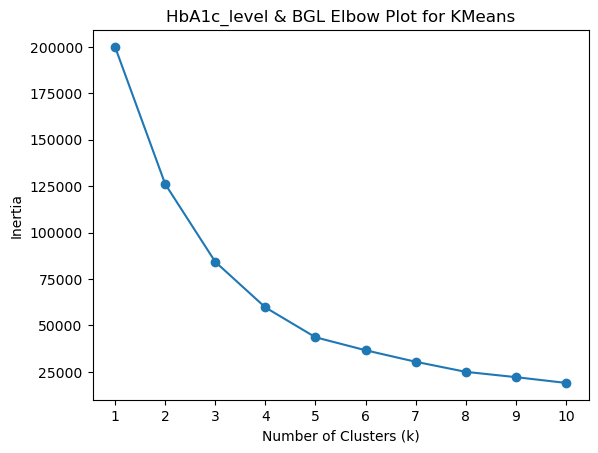

In [4]:
# Perform KMeans clustering with different k values
k_values = range(1, 11)
inertia = []
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(diabetes_df_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow plot
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('HbA1c_level & BGL Elbow Plot for KMeans')
plt.xticks(k_values)
plt.show()

In [5]:
# Create and initialize the K-means model instance for 5 clusters
model = KMeans(n_clusters=5, random_state=1)

# Print the model
model

KMeans(n_clusters=5, random_state=1)

In [6]:
# Fit the data to the instance of the model
model.fit(diabetes_df_scaled)

C:\Users\jaime\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5, random_state=1)

In [7]:
# Make predictions about the data clusters using the trained model
diabetes_prediction = model.predict(diabetes_df_scaled)

# Print the predictions
print(diabetes_prediction)

[2 0 2 ... 2 1 0]


In [8]:
# Create a copy of the DataFrame
diabetes_predictions_df = diabetes_df_subset.copy()

# Add a column to the DataFrame that contains the customer_ratings information
diabetes_predictions_df['diabetes'] = diabetes_prediction

# Review the DataFrame
diabetes_predictions_df.head()

HbA1c_level  blood_glucose_level  diabetes
0          6.6                  140         2
1          6.6                   80         0
2          5.7                  158         2
3          5.0                  155         4
4          4.8                  155         4

In [9]:
# Plot the data points based on the customer rating
diabetes_predictions_df.hvplot.scatter(
    x="HbA1c_level",
    y="blood_glucose_level",
    by="diabetes",
    size=10,  # Adjust marker size
    title="HbA1c Level vs Blood Glucose Level",
    xlabel="HbA1c Level",
    ylabel="Blood Glucose Level",
    legend=False 
).opts(
    opts.Scatter(marker="o", cmap="Category10")
)


C:\Users\jaime\anaconda3\Lib\site-packages\holoviews\core\data\pandas.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return dataset.data.dtypes[idx].type
C:\Users\jaime\anaconda3\Lib\site-packages\holoviews\core\data\pandas.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return dataset.data.dtypes[idx].type


:NdOverlay   [diabetes]
   :Scatter   [HbA1c_level]   (blood_glucose_level)

# Clustering Analysis: Age & Blood Glucose Level

In [10]:
diabetes_df = pd.read_csv("C:/Users/jaime/Assignments/Project 4/diabetes.csv")

selected_columns = ['age', 'blood_glucose_level']
diabetes_df_subset2 = diabetes_df[selected_columns]

diabetes_df_subset2.head()

age  blood_glucose_level
0  80.0                  140
1  54.0                   80
2  28.0                  158
3  36.0                  155
4  76.0                  155

In [11]:
diabetes_df_scaled2 = scaler.fit_transform(diabetes_df_subset2)

C:\Users\jaime\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\jaime\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\jaime\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\jaime\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

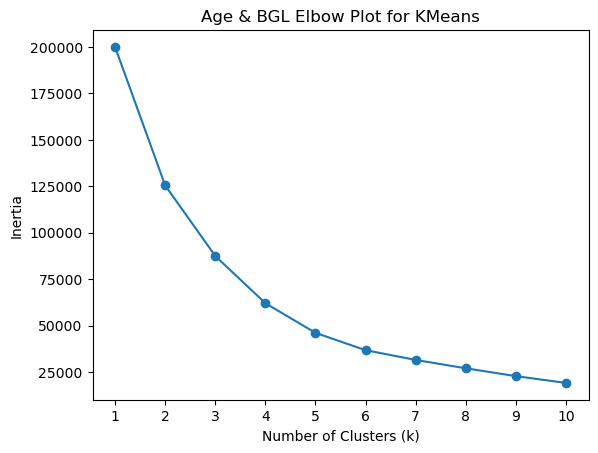

In [12]:
# Perform KMeans clustering with different k values
k_values = range(1, 11)
inertia = []
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(diabetes_df_scaled2)
    inertia.append(kmeans.inertia_)

# Plot the elbow plot
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Age & BGL Elbow Plot for KMeans')
plt.xticks(k_values)
plt.show()

In [13]:
# Create and initialize the K-means model instance for 5 clusters
model = KMeans(n_clusters=5, random_state=1)

# Print the model
model

KMeans(n_clusters=5, random_state=1)

In [14]:
# Fit the data to the instance of the model
model.fit(diabetes_df_scaled2)

C:\Users\jaime\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5, random_state=1)

In [15]:
# Make predictions about the data clusters using the trained model
diabetes_prediction2 = model.predict(diabetes_df_scaled2)

# Print the predictions
print(diabetes_prediction)

[2 0 2 ... 2 1 0]


In [16]:
# Create a copy of the DataFrame
diabetes_predictions2_df = diabetes_df_subset2.copy()

# Add a column to the DataFrame that contains the customer_ratings information
diabetes_predictions2_df['diabetes'] = diabetes_prediction2

# Review the DataFrame
diabetes_predictions2_df.head()

age  blood_glucose_level  diabetes
0  80.0                  140         0
1  54.0                   80         3
2  28.0                  158         2
3  36.0                  155         2
4  76.0                  155         0

In [17]:
# Plot the data points based on the customer rating
diabetes_predictions2_df.hvplot.scatter(
    x="age",
    y="blood_glucose_level",
    by="diabetes",
    size=10,  # Adjust marker size
    title="Age vs Blood Glucose Level",
    xlabel="Age",
    ylabel="Blood Glucose Level",
    legend=False 
).opts(
    opts.Scatter(marker="o", cmap="Category10"),  # Customize marker style and colormap
    opts.Scatter(legend_position="top_right"),  # Adjust legend position
)

C:\Users\jaime\anaconda3\Lib\site-packages\holoviews\core\data\pandas.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return dataset.data.dtypes[idx].type
C:\Users\jaime\anaconda3\Lib\site-packages\holoviews\core\data\pandas.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return dataset.data.dtypes[idx].type


:NdOverlay   [diabetes]
   :Scatter   [age]   (blood_glucose_level)

# Clustering Analysis: Age & BMI

In [18]:
# age & BMI
diabetes_df = pd.read_csv("C:/Users/jaime/Assignments/Project 4/diabetes.csv")

selected_columns = ['age', 'bmi']
diabetes_df_subset3 = diabetes_df[selected_columns]

diabetes_df_subset3.head()

age    bmi
0  80.0  25.19
1  54.0  27.32
2  28.0  27.32
3  36.0  23.45
4  76.0  20.14

In [19]:
diabetes_df_scaled3 = scaler.fit_transform(diabetes_df_subset3)

C:\Users\jaime\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\jaime\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\jaime\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\jaime\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

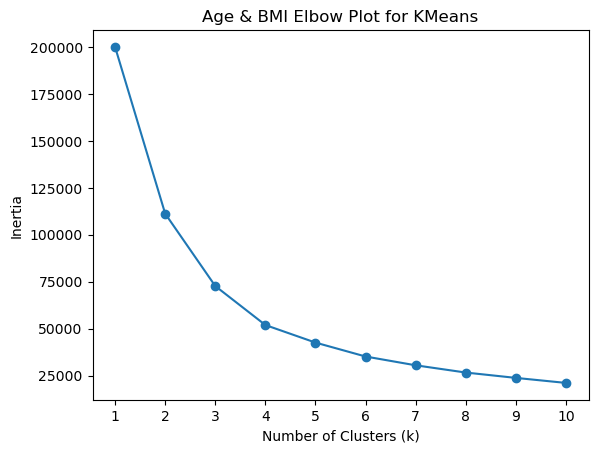

In [20]:
# Perform KMeans clustering with different k values
k_values = range(1, 11)
inertia = []
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(diabetes_df_scaled3)
    inertia.append(kmeans.inertia_)

# Plot the elbow plot
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Age & BMI Elbow Plot for KMeans')
plt.xticks(k_values)
plt.show()

In [21]:
# Create and initialize the K-means model instance for 4 clusters
model = KMeans(n_clusters=5, random_state=1)

# Print the model
model

KMeans(n_clusters=5, random_state=1)

In [22]:
# Fit the data to the instance of the model
model.fit(diabetes_df_scaled3)

C:\Users\jaime\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5, random_state=1)

In [23]:
# Make predictions about the data clusters using the trained model
diabetes_prediction = model.predict(diabetes_df_scaled3)

# Print the predictions
print(diabetes_prediction)

[1 0 3 ... 1 3 0]


In [24]:
# Create a copy of the DataFrame
diabetes_predictions3_df = diabetes_df_subset3.copy()

# Add a column to the DataFrame that contains the customer_ratings information
diabetes_predictions3_df['diabetes'] = diabetes_prediction

# Review the DataFrame
diabetes_predictions3_df.head()

age    bmi  diabetes
0  80.0  25.19         1
1  54.0  27.32         0
2  28.0  27.32         3
3  36.0  23.45         0
4  76.0  20.14         1

In [25]:
# Plot the data points based on the customer rating
diabetes_predictions3_df.hvplot.scatter(
    x="age",
    y="bmi",
    by="diabetes",
    size=10,  # Adjust marker size
    title="Age vs BMI",
    xlabel="Age",
    ylabel="BMI",
    legend=False  
).opts(
    opts.Scatter(marker="o", cmap="Category10"),  # Customize marker style and colormap
    opts.Scatter(legend_position="top_right"),  # Adjust legend position
)

C:\Users\jaime\anaconda3\Lib\site-packages\holoviews\core\data\pandas.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return dataset.data.dtypes[idx].type
C:\Users\jaime\anaconda3\Lib\site-packages\holoviews\core\data\pandas.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return dataset.data.dtypes[idx].type


:NdOverlay   [diabetes]
   :Scatter   [age]   (bmi)